Visualize job postings from the past deacde on www.mathjobs.org and arxiv publication data.

## Obtain and visualize data from the web archive

In [ ]:
from mathjob_ovtime import find_trends
import matplotlib.pyplot as plt
import numpy as np

In [29]:
# prepare some data
x = list(range(2010, 2021))

key_words = [[r"(?i)mathematical physics", 0]]
key_word_counts = find_trends(x, key_words)

y = key_word_counts[r"(?i)mathematical physics"]

Text(0.5, 1.0, 'Mathematical physics jobs')

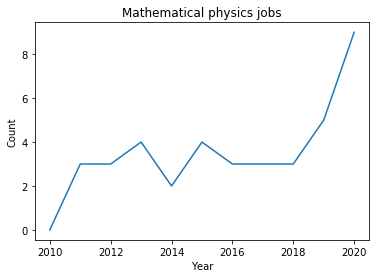

In [46]:
plt.plot(x, y)
plt.ylabel('Count')
plt.xlabel('Year')
plt.title("Mathematical physics jobs")

In [32]:
def get_key_word_counts(query, start=2010, end=2019):
    """ Method to return a list of job postings for years
        'start' to 'end' using the given query. """
    x = list(range(start, end+1))

    key_words = [[query, 0]]
    key_word_counts = find_trends(x, key_words)

    y = key_word_counts[query]
    return y

Plot the job posting for differential geometry.

Text(0.5, 1.0, 'Differential geometry jobs')

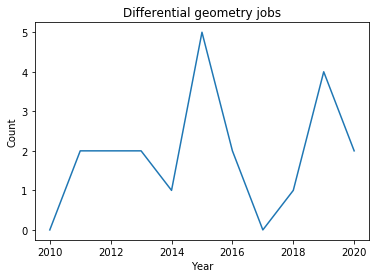

In [47]:
start = 2010
end = 2020
plt.plot(list(range(start, end+1)), get_key_word_counts(r"(?i)differential geometry", start=start, end=end))
plt.ylabel('Count')
plt.xlabel('Year')
plt.title("Differential geometry jobs")

Plot the job posting for machine learning.

Text(0.5, 1.0, 'Machine learning jobs')

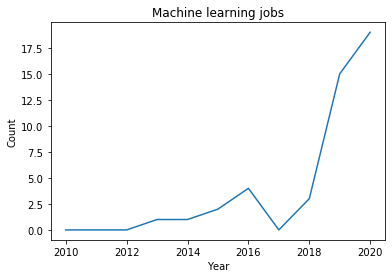

In [48]:
start = 2010
end = 2020
plt.plot(list(range(start, end+1)), get_key_word_counts(r"(?i)machine learning", start=start, end=end))
plt.ylabel('Count')
plt.xlabel('Year')
plt.title("Machine learning jobs")

Plot the job posting for number theory.

Text(0.5, 1.0, 'Number theory jobs')

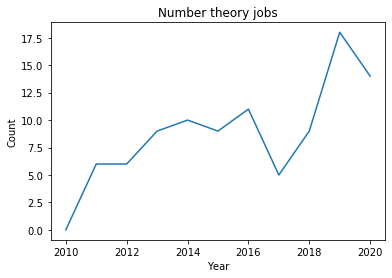

In [49]:
start = 2010
end = 2020
plt.plot(list(range(start, end+1)), get_key_word_counts(r"(?i)number theory", start=start, end=end))
plt.ylabel('Count')
plt.xlabel('Year')
plt.title("Number theory jobs")

## Visualize arxiv publication data

In [9]:
import json
import string
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
%%time
# Load the arxiv dataset found here: https://www.kaggle.com/Cornell-University/arxiv
metadata_list  = []
with open("../data/raw/archive/arxiv-metadata-oai-snapshot.json", 'r') as f:
    for line in f: 
        metadata_list.append(json.loads(line))

Wall time: 59.4 s


In [18]:
metadata = pd.DataFrame(metadata_list)
print(metadata.shape)
metadata.head()

(1915641, 14)


,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
2,0704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]"
3,0704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,None,math.CO,None,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]"
4,0704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,"Illinois J. Math. 52 (2008) no.2, 681-689",None,None,math.CA math.FA,None,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]"


In [19]:
metadata["update_date_mod"] = pd.to_datetime(metadata.update_date)
metadata["id"] = 1

In [20]:
# Sort the publications by year and only work with publications from 2009 to 2020
metadata = metadata.sort_values("update_date_mod")[(metadata.update_date_mod < "2021-01-01") & (metadata.update_date_mod > "2009-12-31")]

C:\Users\krajarat\AppData\Local\Temp/ipykernel_16016/1548241886.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  metadata = metadata.sort_values("update_date_mod")[(metadata.update_date_mod < "2021-01-01") & (metadata.update_date_mod > "2009-12-31")]


Plot publications from differential geometry over the past decade.

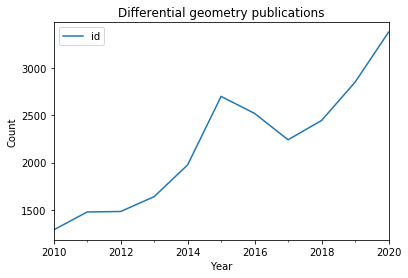

In [43]:
metadata[metadata.categories.str.contains("math.DG")].resample("Y", on="update_date_mod").sum() \
.plot(xlabel="Year", ylabel="Count", title="Differential geometry publications")

Plot publications from mathematical physics over the past decade.

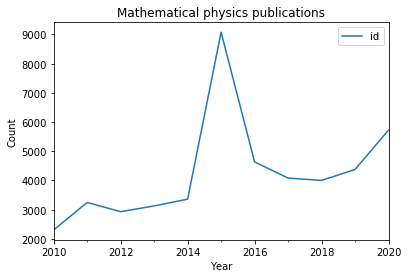

In [44]:
metadata[metadata.categories.str.contains("math.MP")].resample("Y", on="update_date_mod").sum() \
.plot(xlabel="Year", ylabel="Count", title="Mathematical physics publications")

Plot publications from number theory over the past decade.

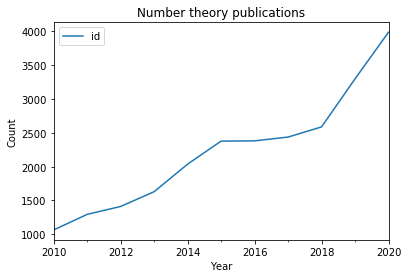

In [45]:
metadata[metadata.categories.str.contains("math.NT")].resample("Y", on="update_date_mod").sum() \
.plot(xlabel="Year", ylabel="Count", title="Number theory publications")

Plot publications from machine learning over the past decade.

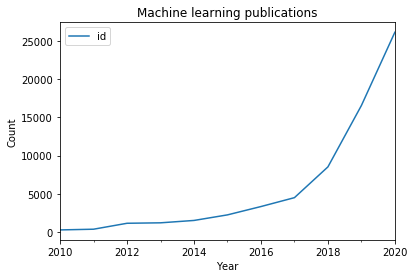

In [42]:
metadata[metadata.categories.str.contains("cs.LG")].resample("Y", on="update_date_mod").sum() \
.plot(xlabel="Year", ylabel="Count", title="Machine learning publications")